In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [15]:
data = pd.read_csv('csv/DXYArea.csv')[[
    'cityName', 'city_confirmedCount', 'city_suspectedCount',
    'city_curedCount', 'city_deadCount', 'updateTime'
]]
data_copy = data.copy()


def get_data_by_cities(data, cities):
    # 删除非武汉的行
    data.drop(data[~data['cityName'].isin(cities)].index, inplace=True)

    # updateTime格式处理
    data['updateTime'] = data['updateTime'].map(lambda x: x[:10])

    data_cities = pd.DataFrame([])
    for city in cities:
        data_city = data.drop(data[data['cityName'] != city].index)

        data_city = data_city.groupby(['updateTime']).max()

        data_city['city_increase_confirmed'] = data_city[
            'city_confirmedCount'].diff(1).fillna(0)

        data_cities = data_cities.append(data_city)

    return data_cities


data_cities = get_data_by_cities(data.copy(), ['黄石', '鄂州', '黄冈', '咸宁'])
result = data_cities.pivot(columns='cityName')['city_confirmedCount']

In [32]:
r=result[:5].fillna(0)

In [33]:
r

cityName,咸宁,鄂州,黄冈,黄石
updateTime,,,,
2020-01-24,0.0,0.0,12.0,0.0
2020-01-25,0.0,1.0,64.0,31.0
2020-01-26,43.0,1.0,122.0,31.0
2020-01-27,64.0,20.0,154.0,36.0
2020-01-28,91.0,57.0,213.0,53.0


<IPython.core.display.Javascript object>


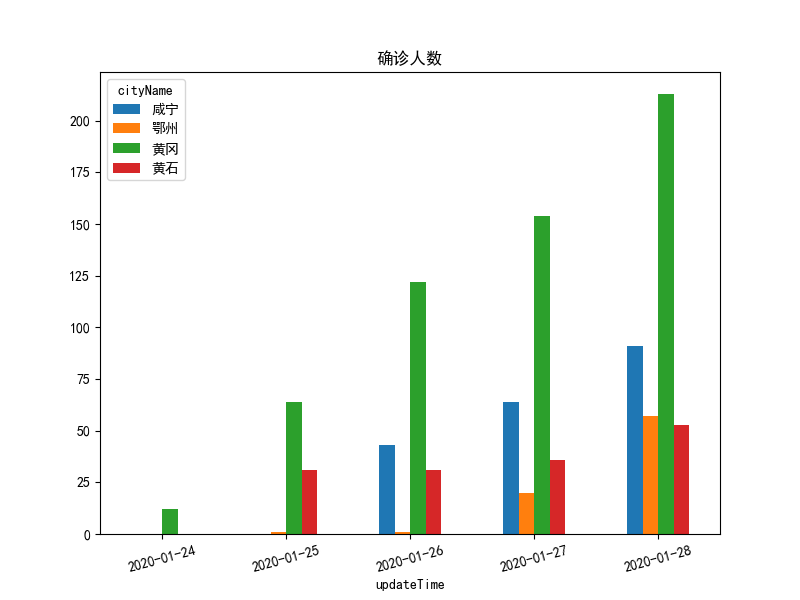

In [39]:
r.plot(kind='bar',figsize=(8,6),title='确诊人数',rot=15)